In [ ]:
#Solution Approach for "Blogs Categories" Dataset using Naive Bayes for Text Classification and Sentiment Analysis
#1. Data Exploration and Preprocessing
#a. Load the Dataset and Initial Exploration
#The first step is to load the "blogs_categories.csv" dataset and perform some basic exploration to understand the structure and content.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'D:\HI448116_Santosh_Karpe\FY25\DOCS\III\Ass\ASA - SK\blogs.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows to get a sense of the data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [ ]:
#Data Cleaning
#We need to preprocess the text data before feeding it into a machine learning model. Preprocessing typically involves:
#Converting the text to lowercase
#Removing punctuation, special characters, and numbers
#Removing stopwords (commonly used words that don't carry much meaning, like "the", "and", "is")
#Tokenization (splitting text into individual words or tokens)
#Lemmatization or stemming (reducing words to their base form)

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

# Clean text function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply the cleaning function to the 'Text' column
df['cleaned_text'] = df['Data'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hi448116\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hi448116\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hi448116\AppData\Roaming\nltk_data...


In [ ]:
#Feature Extraction
#We will convert the cleaned text into numerical representations using the TF-IDF (Term Frequency-Inverse Document Frequency) technique.
#This method helps capture the importance of a word in relation to the entire corpus of documents.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Labels']

In [ ]:
#Naive Bayes Model for Text Classification
#a. Data Split
#We will split the dataset into training and testing sets (80-20% split) for model evaluation.

In [4]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model Implementation
#Now, we will implement the Naive Bayes classifier for text classification.
#We will use the MultinomialNB from scikit-learn, which is well-suited for text classification tasks.

In [5]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

In [ ]:
#Sentiment Analysis
#a. Sentiment Analysis using VADER
#For sentiment analysis, we will use the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, 
#which is effective for analyzing social media or short text.

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the cleaned text
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)


In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hi448116\AppData\Roaming\nltk_data...


True

In [ ]:
#Sentiment Distribution Analysis
#Next, we will analyze the distribution of sentiments across different categories.

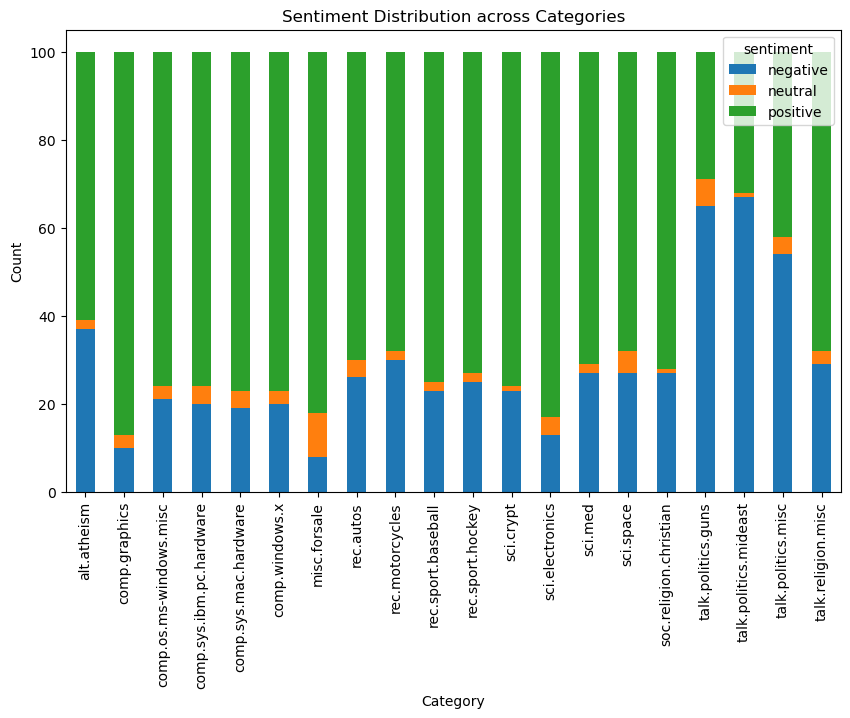

In [9]:
# Group by categories and calculate the distribution of sentiments
sentiment_distribution = df.groupby(['Labels', 'sentiment']).size().unstack().fillna(0)

# Visualize the sentiment distribution for each category
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution across Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

In [ ]:
#Evaluation
#Model Evaluation
#We will evaluate the performance of the Naive Bayes model using common metrics like accuracy, precision, recall, and F1-score.

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

Accuracy: 0.8475
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.73      0.89      0.80        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.88      0.84      0.86        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.88      0.94      0.91        16
      rec.sport.baseball       0.82      1.00      0.90        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.76      0.81      0.79        16
                 sci.med       0.94      0.88      0.91   

In [ ]:
#Report Structure
#Introduction

#Overview of the dataset and objectives of the assignment.
#Data Exploration and Preprocessing

#Summary of the data exploration steps.
#Explanation of data cleaning, tokenization, and text preprocessing techniques used.
#Naive Bayes Classification
#Explanation of the Naive Bayes model and its application to text classification.
#Results from model evaluation (accuracy, precision, recall, F1-score).
#Sentiment Analysis
#Description of the sentiment analysis process using VADER.
#Visualizations and interpretation of sentiment distribution across categories.